$$\require{cancel}$$
$$\require{separator}$$

This notebook is based of https://www.youtube.com/watch?v=KDsd1F6oy78

In [1]:
from knowledge import show_graph, showg, load, save, append

У нас есть не смещенный оценщики, они все не смещенные, но мы хотим найти такой оценщик у которого будет наименьшая дисперсия, тогда мы его и будем использовать. и тут возникает вопрос - а есть такой? И возникает еще один вопрос - а есть вообще предел того насколько может быть маленькой эта оценка дисперсии, и ответ - да. Существует нижняя граница "наименьшая дисперсия", оценки дисперсии, и если найти такой оценщик который будет находиться на этой границе - это будет самым лучший оценщиком! Не возможно найти оценщик с меньше деисперсией и чтбы при этом он оставался не смещенным.

Вот об этом и поведает нам **Cramer-Rao Lower Bound**

В нем мы будем использовать Fisher Information 

$\mathcal{I}_n(\theta)=-\mathbb{E}\left[\dfrac{\partial^2}{\partial\theta^2} \ln f (X|\theta)\right]=\text{Var}\left[\dfrac{\partial}{\partial\theta}\ln f(X|\theta)\right]=n\mathcal{I}_1(\theta)$

Главное условия - это возможность интегрировать под суммой под интегралом. подробней тут
["The MLE - Asymptotic Normality"](Unit3-Lecture-09.1%20MLE%20Asymptotic%20Normality.ipynb#)

**Theorem: Cramero-Rao - Lower Bound**

Пускай $X_i\sim f(X_i|\theta),\,i=1,\dots,n$ при удовлетворении определенных регулирующий словий. Допустим $T=T(\overrightarrow{X})$ это не смещенный оценка функции $g(\theta)$ тогда:
$$\text{Var}(T)\geq\dfrac{[g^{'}(\theta)]^2}{n\mathcal{I}_1(\theta)}$$
это выражение можно назвать числом, почему "числом"? потому что тут нет никакой случайности - как только мы создадим выборку размером $n$, а $n$ - фиксированное число, а также не известный параметр зафиксирован, получается что эт не случайная переменная а - **число**. 
Любой не смещенный оценщик должен быть равен или больше чем это **число**.

**Доказательство.**
> Мы предполагаем что $\text{Var}(T)<\infty,\, \mathcal{I}(\theta)<\infty$ иначе - выражение становиться тривиальным, потому что если $\mathcal{I}_1(\theta)\to\infty$ тогда дробь выше, становиться 0. и тогда очевидно что все что хочешь больше нуля.

Пусть $X_i\sim f(X_i|\theta),\, i=1,\dots,n$
мы может подсчитать PDF этой функции, и мы знаем что она будет равна 1 по всем значениям X. Так как наша выборака это вектор, у нас получается **Joint** распределение. поэтому мы должны интегрировать по всем $X$

$$\idotsint \limits _{\mathbb{R}^n}f(\overrightarrow{X}|\theta)d\overrightarrow{x}=1$$

и если взять интеграл от производной то получиться 0. $$\idotsint \limits _{\mathbb{R}^n} \color{blue}{\dfrac{\partial}{\partial\theta}f(\overrightarrow{X}|\theta)}d\overrightarrow{x}=0$$ 
на рисунке ниже можно это понять, что производная будет равна 0, не вежно какой степени.

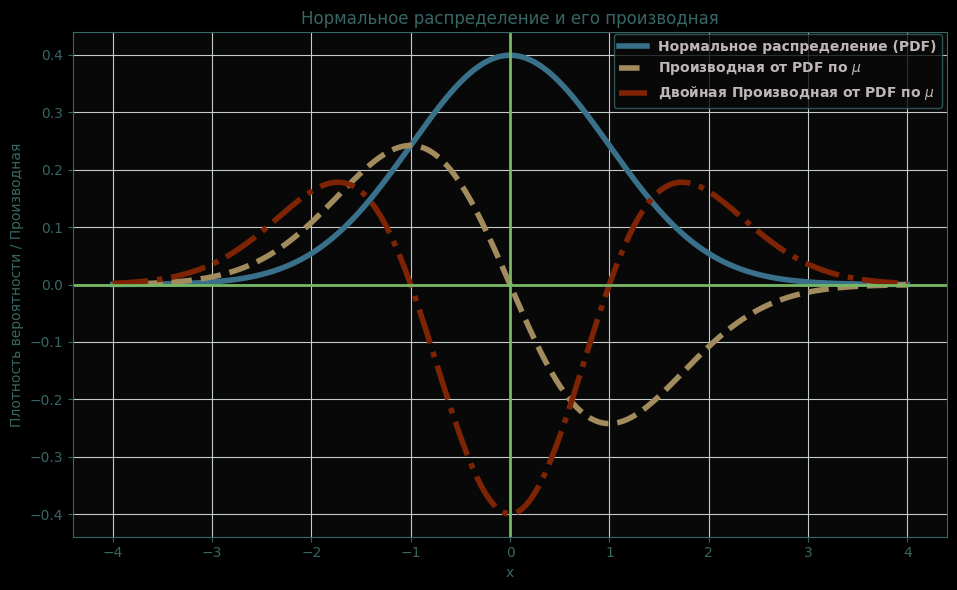

Посмотрим на **мат ожидание производной логарифма PDF:**
$\displaystyle\mathbb{E}\left[\color{blue}{\dfrac{\partial}{\partial\theta}\ln f(\overrightarrow{X}|\theta)}\right]=\idotsint \limits _{\mathbb{R}^n}\color{blue}{\dfrac{\partial}{\partial\theta}\ln f(\overrightarrow{X}|\theta)}\cdot \color{green}{f(\overrightarrow{X}|\theta)}d\overrightarrow{x}=0$,
$\qquad=\idotsint \limits _{\mathbb{R}^n} \color{blue}{\dfrac{\dfrac{\partial}{\partial\theta} f(\overrightarrow{X}|\theta)}{\bcancel{f(\overrightarrow{X}|\theta)}}}\cdot \color{green}{\bcancel{f(\overrightarrow{X}|\theta)}}d\overrightarrow{x}=$\
$\displaystyle\qquad=\idotsint \limits _{\mathbb{R}^n} \color{blue}{\dfrac{\partial}{\partial\theta} f(\overrightarrow{X}|\theta)}d\overrightarrow{x}=0$

Это выражение равно нулю, как мы определили выше. что интеграл первой производной равен нулю.

Теперь взглянем на **мат ожидание. оценки на производную логарифма PDF**
У нас повторяется все тоже самое, и часть наших сокращений, пойдут по тойже схеме как и выше.

$\displaystyle\mathbb{E}\left[\color{blue}{T(\overrightarrow{X})\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)}\right]=\idotsint \limits _{\mathbb{R}^n} \color{blue}{T(\overrightarrow{X}) \dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)}\cdot f(\overrightarrow{X}|\theta)d\overrightarrow{X} $
$\displaystyle\qquad=\idotsint \limits _{\mathbb{R}^n}  \color{blue}{T(\overrightarrow{X})\dfrac{\dfrac{\partial}{\partial\theta}  f(\overrightarrow{X}|\theta)}{\bcancel{f(\overrightarrow{X}|\theta)}}}\cdot \color{green}{\bcancel{f(\overrightarrow{X}|\theta)}}d\overrightarrow{x}=$

> опять же мы сокращаем из производной логарифма функции и множетель PDF и получаем производную функции, как на выражениии выше и получаем

$\qquad=\displaystyle\idotsint \limits _{\mathbb{R}^n} \color{blue}{T(\overrightarrow{X}) \dfrac{\partial}{\partial\theta} f(\overrightarrow{X}|\theta)}d\overrightarrow{X}$\
> В соотв. с условиями которые мы описали выше, мы можем вынести производную за пределы интеграла

$\qquad=\displaystyle\dfrac{\partial}{\partial\theta} \idotsint \limits _{\mathbb{R}^n} \color{blue}{T(\overrightarrow{X}) f(\overrightarrow{X}|\theta)}d\overrightarrow{X}$

> тогда у нас получилас формула мат ожидания для оценки $T(\overrightarrow{X})$

$\qquad=\displaystyle\dfrac{\partial}{\partial\theta}\mathbb{E}[T(\overrightarrow{X})]=
\dfrac{\partial}{\partial\theta}g(\theta)=g^{'}(\theta)$

Теперь мы соберем все этим кусочки вместе. мы рассмотрим **ковариацию между нашей оценкой и производной логарифма PDF**

$\displaystyle \text{Cov}\left(T(\overrightarrow{X}), \dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)\right)=$
$\begin{gather}
&\qquad=&\displaystyle\mathbb{E}\left[T(\overrightarrow{X})\cdot \dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta))\right]&-&\mathbb{E}\left[T(\overrightarrow{X})\right]&\cdot  &\mathbb{E}\left[ \dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta))\right]\\
&\qquad=&\displaystyle g^{'}(\theta) &- & g(\theta) &\cdot &0\\
&\qquad=&\displaystyle g^{'}(\theta)
\end{gather}$

> Напомним себе что $-1\leq \dfrac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}\leq1$\
и если взять абсолютное значение тогда:\
> $\left|\,\dfrac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}\,\right|\leq1$\
> перенесем квадратный корень
> $\left|\,\text{Cov}(X,Y)\,\right|\leq \sqrt{\text{Var}(X)\text{Var}(Y)}$


Следовательно
$$|\,g^{'}(\theta)|\leq \sqrt{\text{Var}(T(\overrightarrow{X}))\,\text{Var}(\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta))}$$
> разобъем квадратный корень

$$|\,g^{'}(\theta)|\leq \sqrt{\text{Var}(T(\overrightarrow{X}))}\,\sqrt{\text{Var}(\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta))}$$

$$\dfrac{|\,g^{'}(\theta)|}{\sqrt{\text{Var}\left(\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)\right)}}\leq \sqrt{\text{Var}\left(T(\overrightarrow{X})\right)}$$
> возведем в квадрат

$$\left[\dfrac{|\,g^{'}(\theta)|}{\sqrt{\text{Var}\left(\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)\right)}}\right]^{\,2}\leq \sqrt{\text{Var}\left(T(\overrightarrow{X})\right)}^{\,2}$$

$$\dfrac{[\,g^{'}(\theta)]^{\,2}}{\text{Var}\left(\dfrac{\partial}{\partial\theta} \ln f(\overrightarrow{X}|\theta)\right)}\leq \text{Var}\left(T(\overrightarrow{X})\right)$$

$$\dfrac{[\,g^{'}(\theta)]^2}{n\mathcal{I}_1(\theta)}\leq \text{Var}\left(T(\overrightarrow{X})\right)$$

$$\fbox{$\text{Var}\left(T(\overrightarrow{X})\right)\geq\dfrac{[\,g^{'}(\theta)]^{\,2}}{n\mathcal{I}_1(\theta)}$} $$

$$\blacksquare $$

**Заметки**

1. Если $g(\theta)=\theta$ тогда $\text{Var}(T(\overrightarrow{X}))\geq\dfrac{1}{n\mathcal{I}_1(\theta)}$
2. Если $\text{Var}(T(\overrightarrow{X}))\geq\dfrac{[g^{'}(\theta)]^2}{n\mathcal{I}_1(\theta)}$, тогда $T(\overrightarrow{X})$ есть один из UMVUE

Uniformaly Minimum Unbaiesd Variance Estimator

Summary:

Это неравентсво показывает нам 

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('../data/airliner-accidents.csv')
df.head()

,Entity,Code,Year,Fatal accidents per million commercial flights
0,World,OWID_WRL,1970,64.561.877
1,World,OWID_WRL,1971,4.945.026
2,World,OWID_WRL,1973,6.246.864
3,World,OWID_WRL,1974,62.669.506
4,World,OWID_WRL,1975,4.759.484


In [10]:
data= df['Fatal accidents per million commercial flights'].values

In [11]:
data

array(['64.561.877', '4.945.026', '6.246.864', '62.669.506', '4.759.484',
       '5.437.681', '5.244.103', '40.260.415', '5.162.671', '30.827.005',
       '37.000.613', '30.960.352', '2.974.337', '2.630.656', '32.778.895',
       '29.975.545', '32.465.572', '38.902.376', '38.513.384',
       '2.879.888', '34.120.424', '31.503.875', '268.982', '27.876.346',
       '27.209.826', '25.852.609', '18.929.123', '2.391.468',
       '21.218.522', '16.811.565', '16.169.442', '15.852.133',
       '12.216.543', '13.472.201', '14.040.471', '96.659.666',
       '1.153.136', '10.196.842', '8.804.662', '91.099.477', '10.469.499',
       '5.524.613', '7.309.849', '55.659', '29.973.468', '4.612.551',
       '28.008.196', '38.014.314', '51.015.496', '39.103.588'],
      dtype=object)